In [1]:
from allthethings import PyNetwork, PyPipe_ps
from allthethings import PyBC_opt_dh
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
fi = "indata/waterhammer.inp"
fc = "indata/waterhammer.config"
mtype = 1
n1 = PyNetwork(fi,fc,mtype)
M = n1.M
N = n1.Ns[0]
L = n1.Ls[0]
a = n1.a[0]
T1 =n1.T
D = n1.Ds[0]
p1 = PyPipe_ps(N, D, L, M, a)
dt = T1/M
print n1.a
e0 = D*D*np.pi/4.-p1.AofH(0.015, False)
e0 = 0.008
print e0/p1.AofH(0.1,True)
b0= e0*np.ones(M+1)


[1200.0]
0.286164472251


In [3]:
n1.runForwardProblem(dt)

In [4]:
q = n1.q(0)
h = n1.getHofA(0)
qhist = n1.qhist(0)

In [5]:
def idx_t(i,j,n):
    return (2*(N+2)*n+(N+2)*i+j)

0.6002543885
Af =0.196350 
dH/dV = 122.448846
a/g = 122.448980
600


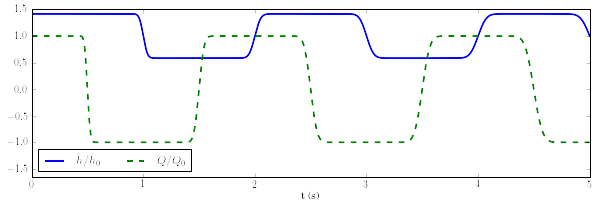

In [32]:

T1 = n1.T
t = linspace(0,T1, M+1)


A0 = 150;
Q0 = .1;
n7 = 599

A = [p1.HofA(qhist[idx_t(0,n7,n)], True)/A0 for n in range(M+1)]
Q = [qhist[idx_t(1,0,n)]/Q0 for n in range(M+1)]
Q2 = [qhist[idx_t(1,n7-10,n)] for n in range(M+1)]
#P0 = [p1.HofA(qhist[idx_t(0,0,n)], False) for n in range(M+1)]

rc('text', usetex=True)        #for tex rendering. 
rc('font', family='serif')     #for pretty font 
print dt/n1.Ls[0]*n1.Ns[0]*n1.cmax[0]
fig = plt.figure(figsize=(10,3))
ax = fig.add_subplot(111)
Af =.25**2*np.pi
print "Af =%f "%Af
dH = (max(A)-min(A[0:-2]))*A0
dV = 2*Q0/Af
print "dH/dV = %f" %(dH/dV)
print "a/g = %f" %(a/9.8)
ax.plot(t,A,linewidth=2)
ax.plot(t,Q,'--',lw=2)
ax.set_xlabel('t (s)')
ax.set_ylim((-1.65,1.5))
ax.legend([r'$h/h_0$',r'$Q/Q_0$'],loc = 'lower left', ncol=2)#bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
#           ncol=2, borderaxespad=0.)
#title("|dH/dV - a/g| = %.4f" %(fabs(dH/dV-a/9.8)))
print n1.Ns[0]
savefig("../waterhammergood.eps", format='eps')


In [7]:
dx = n1.Ls[0]/n1.Ns[0]

In [8]:
print dt/dx*n1.a[0]

0.6


In [9]:
print fabs(dH/dV-a/9.8)

0.000133854104561


In [34]:
print n1.Ns



[600]
